In [26]:
# Import libraries here
import pandas as pd
import plotly.express as px

# Install statsmodels
!pip install statsmodels

In [25]:
# Load the data
schools_df = pd.read_csv("datasets/schools.csv")

I began my analysis by exploring the shape and description of the dataframe.

In [13]:
schools_df.shape

(1834, 5)

In [14]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   school_name                         1834 non-null   object 
 1   total_enrollment                    1834 non-null   float64
 2   percent_students_with_disabilities  1834 non-null   float64
 3   percent_english_learners            1834 non-null   float64
 4   percent_poverty                     1834 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.8+ KB


I then plotted the distribution of each column as a histogram.

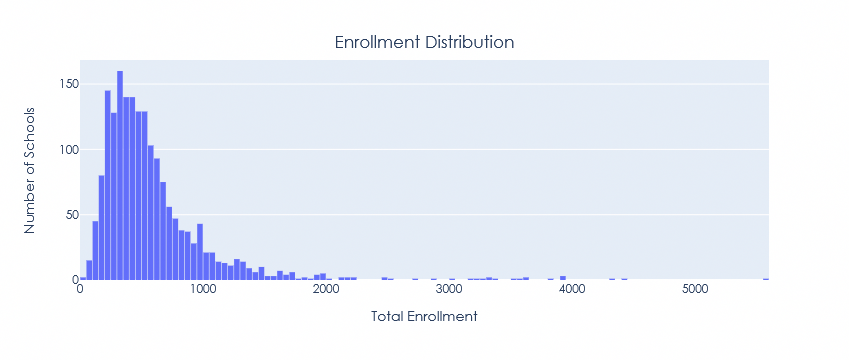

In [3]:
# Plot the distribution of total student enrollment
px.histogram(
    data_frame=schools_df, 
    x="total_enrollment"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Enrollment Distribution",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Total Enrollment",
    yaxis_title="Number of Schools"
)

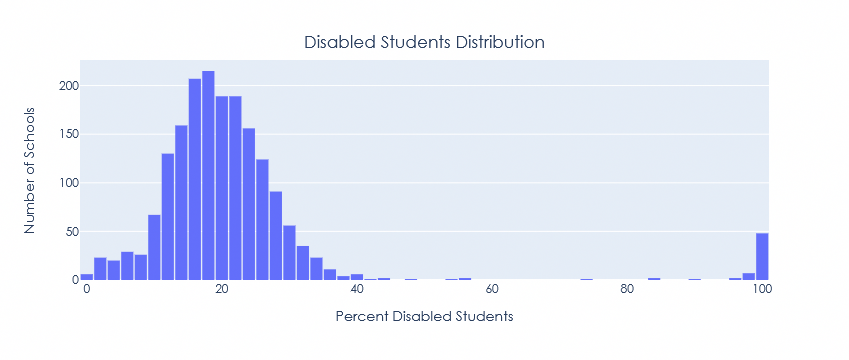

In [4]:
# Plot the distribution of the % of students with disabilities in schools
px.histogram(
    data_frame=schools_df, 
    x="percent_students_with_disabilities"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Disabled Students Distribution",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Percent Disabled Students",
    yaxis_title="Number of Schools"
)

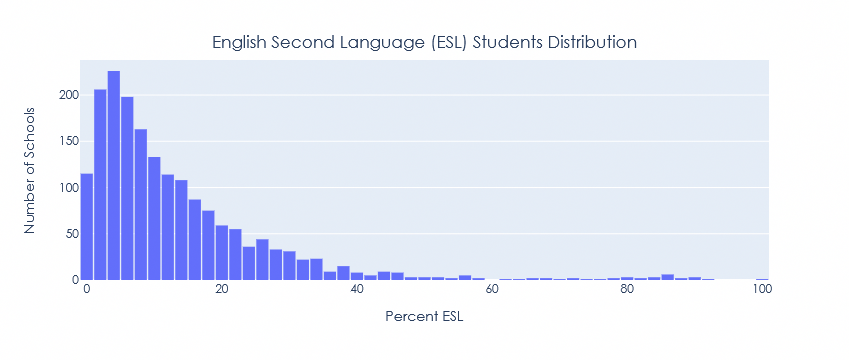

In [5]:
# Plot the distribution of the % of students who are learning English as a second language in schools
px.histogram(
    data_frame=schools_df, 
    x="percent_english_learners"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"English Second Language (ESL) Students Distribution",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Percent ESL",
    yaxis_title="Number of Schools"
)

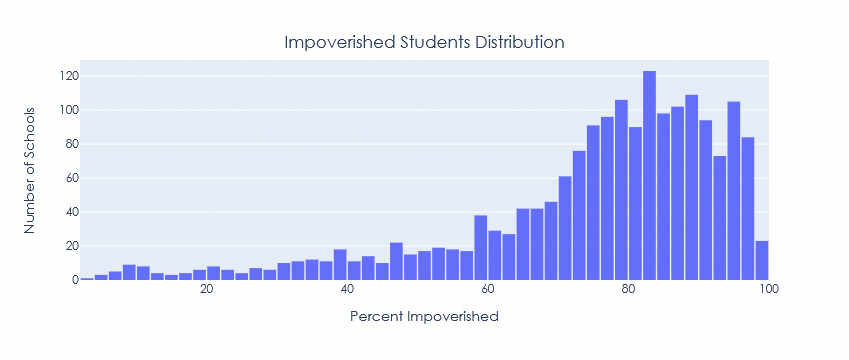

In [6]:
# Plot the distribution of the % of students whose families are below the poverty line in schools
px.histogram(
    data_frame=schools_df, 
    x="percent_poverty"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Impoverished Students Distribution",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Percent Impoverished",
    yaxis_title="Number of Schools"
)

Based on these four histograms, I concluded that the typical NYC public high school has enrollment around 200 to 550 students, about a fifth of the students are disabled, 0% to 10% are English learners, and a whopping 78% to 96% of students live in poverty.

That poverty figure was particularly shocking. To explore further, I calculated the correlation between the columns. This way, I could see if poverty was connected to a particular demographic, which could be indicative of a demographic in need of help.

In [23]:
# Find correlation between all pairs
columns = schools_df.columns
for i in range(1, len(columns)):
    for j in range(i+1, len(columns)):
        print("====================================================================================")
        print(f"{columns[i]} vs. {columns[j]}: {schools_df[columns[i]].corr(schools_df[columns[j]])}")
print("")

total_enrollment vs. percent_students_with_disabilities: -0.17681694172950482
total_enrollment vs. percent_english_learners: 0.027771076436870556
total_enrollment vs. percent_poverty: -0.14309105341714376
percent_students_with_disabilities vs. percent_english_learners: 0.02082033710532716
percent_students_with_disabilities vs. percent_poverty: 0.07957764019214622
percent_english_learners vs. percent_poverty: 0.31547666796288915


While most of the variables had a weak correlation, there was a relatively strong correlation between poverty and ESL students. To visualize the relationship, I create a scatterplot of % poverty vs. % ESL students, along with a correlation line.

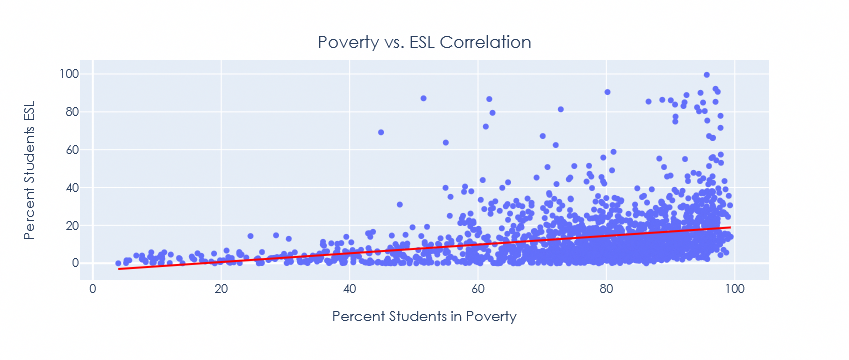

In [21]:
# Creates a scatter plot of percent_english_learners vs percent_poverty, with a correlation line
px.scatter(
    data_frame=schools_df,
    trendline="ols",
    trendline_color_override="red",
    x="percent_poverty", 
    y="percent_english_learners",
    render_mode="svg"
).update_layout(
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Poverty vs. ESL Correlation",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Percent Students in Poverty",
    yaxis_title="Percent Students ESL"
)

As shown on the graph, most schools follow the gradual slope of the correlation line, we can see a handful of schools with high percentages of ESL and impoverished students. Assisting these schools will come with a variety of challenges as a result of the intersection between these issues.

Students in these schools will need extra care, as teachers will need to cover the gaps in education caused by poverty, and simultaneously be ready to speak at least some amount of non-English languages in order to communicate effectively. Teachers will also need to be ready to deal with trauma-induced behavior and misbehavior in the classroom, as economic hardships, immigration concerns, and language barriers put students under significant amounts of stress. And this extends outside the classroom as well: outreach to guardians/family need to be addressed in ways that are linguistically and culturally appropriate

Thus, policymakers should take a multifaceted approach to this problem. Incentivize teachers to obtain ESL certifications, and train current teachers on ELL to bridge language gaps in the classroom. Targeted funding should be provided to schools with especially high amounts of poverty and/or English learners in order to support bilingual social workers, after-school programs, and other resources that provide neeed aid to disadvantaged students. Lastly, test-based performance that penalizes less privileged schools should be replaced with growth an community based performance, such as school climate and attendance.